In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML



In [6]:
Nt, Nx, Ny = 500, 60, 60
nu = 0.3
x = np.linspace(-5, 5, Nx)
y = np.linspace(-5, 5, Ny)
t = np.linspace(0, 10, Nt)
delta = x[1] - x[0]
deltat = t[1] - t[0]

In [7]:
def um(x, y):
    return 5 * np.exp(-x**2 - y**2)

X, Y = np.meshgrid(x, y)
U = np.zeros((Nt, Nx, Ny))
U[0, :, :] = um(X, Y)
h = 1 / (2 * delta)
nuu = nu / (delta ** 2)

In [8]:
def get_solution(U):
    for l in range(1, Nt):
        U[l, 1:-1, 1:-1] = U[l-1, 1:-1, 1:-1] + deltat * (
            nuu * (U[l-1, 2:, 1:-1] - 2 * U[l-1, 1:-1, 1:-1] + U[l-1, :-2, 1:-1] +
                                U[l-1, 1:-1, 2:] - 2 * U[l-1, 1:-1, 1:-1] + U[l-1, 1:-1, :-2]) -
            U[l-1, 1:-1, 1:-1] * ((U[l-1, 2:, 1:-1] - U[l-1, :-2, 1:-1]) * h +
                                  (U[l-1, 1:-1, 2:] - U[l-1, 1:-1, :-2]) * h)
        )

get_solution(U)

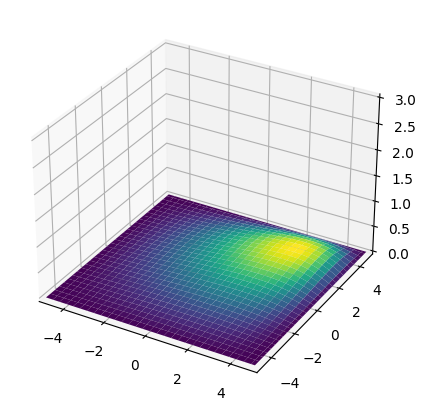

In [9]:
fig = plt.figure(figsize=(5, 6))
ax = fig.add_subplot(111, projection='3d')

def init():
    ax.set_xlim3d(-5, 5)
    ax.set_ylim3d(-5, 5)
    ax.set_zlim3d(0, 3)

def update(i):
    ax.clear()
    init()
    ax.plot_surface(X, Y, U[i, :, :], cmap='viridis')

animation = animation.FuncAnimation(fig, update, frames=Nt, init_func=init)
HTML(animation.to_html5_video())

